## Instalamos las librerías correspondientes

In [140]:
from pycoingecko import CoinGeckoAPI
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Definimos la funcione a través de la cuale obtendremos el dataset para el análisis

In [107]:
cg = CoinGeckoAPI()

In [108]:
def get_specific_coin_data(coin_ids, csv_filename):
    coin_data = cg.get_coins_markets(vs_currency = 'usd', ids = coin_ids, orden = 'market_cap_desc')
    cryptos = pd.DataFrame(coin_data)
    
    try:
        existing_cryptos = pd.read_csv(csv_filename)
        cryptos = pd.concat([existing_cryptos, cryptos], ignore_index=True)
    except FileNotFoundError:
        pass
    
    cryptos.to_csv(csv_filename, index=False)

## Cargamos el dataset

- Dataset general de la criptomoneda:
    * Precio actual.
    * Valor minimo histórico.
    * Valor máximo histórico.
    * Cantidad actual de monedas que existen en el mercado.
    * Cantidad máxima de monedas que pueden existir contando incluso las que no se han emitido o minado.

In [109]:
coin_ids = ['bitcoin', 'ethereum', 'solana', 'matic-network', 'ripple', 'tether', 'usd-coin', 'cosmos', 'terra-luna-2', 'cardano']
csv_filename = 'selected_cryptocurrencies.csv'
get_specific_coin_data(coin_ids, csv_filename)

In [110]:
crypto = pd.read_csv('selected_cryptocurrencies.csv')

## Comprensión de los datos

- DataFrame 'head'
- DataFrame 'info'
- DataFrame 'describe'
- DataFrame 'shape'

In [111]:
crypto.head()

,id,symbol,name,image,current_price,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,high_24h,...,total_supply,max_supply,ath,ath_change_percentage,ath_date,atl,atl_change_percentage,atl_date,roi,last_updated
0,bitcoin,btc,Bitcoin,https://assets.coingecko.com/coins/images/1/la...,29158.000000,567150263724,1,6.120690e+11,8452551471,29409.000000,...,2.100000e+07,2.100000e+07,69045.00,-57.78660,2021-11-10T14:24:11.849Z,67.810000,42882.70910,2013-07-06T00:00:00.000Z,NaN,2023-08-16T07:48:31.137Z
1,ethereum,eth,Ethereum,https://assets.coingecko.com/coins/images/279/...,1825.010000,219205563411,2,2.192056e+11,4399526000,1842.870000,...,1.201391e+08,NaN,4878.26,-62.59740,2021-11-10T14:24:19.604Z,0.432979,421305.35274,2015-10-20T00:00:00.000Z,"{'times': 82.68227446822765, 'currency': 'btc'...",2023-08-16T07:48:32.292Z
2,tether,usdt,Tether,https://assets.coingecko.com/coins/images/325/...,0.997914,83082452277,3,8.308245e+10,11824190568,1.001000,...,8.318200e+10,NaN,1.32,-24.51011,2018-07-24T00:00:00.000Z,0.572521,74.45705,2015-03-02T00:00:00.000Z,NaN,2023-08-16T07:45:00.330Z
3,ripple,xrp,XRP,https://assets.coingecko.com/coins/images/44/l...,0.600442,31632509017,5,5.992449e+10,1405353516,0.627645,...,9.998852e+10,1.000000e+11,3.40,-82.36742,2018-01-07T00:00:00.000Z,0.002686,22207.82790,2014-05-22T00:00:00.000Z,NaN,2023-08-16T07:48:34.815Z
4,usd-coin,usdc,USD Coin,https://assets.coingecko.com/coins/images/6319...,0.999516,26025371040,6,2.602537e+10,2315728784,1.002000,...,2.602827e+10,NaN,1.17,-14.73667,2019-05-08T00:40:28.300Z,0.877647,13.92835,2023-03-11T08:02:13.981Z,NaN,2023-08-16T07:48:34.746Z


In [112]:
crypto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 26 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                10 non-null     object 
 1   symbol                            10 non-null     object 
 2   name                              10 non-null     object 
 3   image                             10 non-null     object 
 4   current_price                     10 non-null     float64
 5   market_cap                        10 non-null     int64  
 6   market_cap_rank                   10 non-null     int64  
 7   fully_diluted_valuation           9 non-null      float64
 8   total_volume                      10 non-null     int64  
 9   high_24h                          10 non-null     float64
 10  low_24h                           10 non-null     float64
 11  price_change_24h                  10 non-null     float64
 12  price_chang

In [113]:
crypto.describe()

,current_price,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,high_24h,low_24h,price_change_24h,price_change_percentage_24h,market_cap_change_24h,market_cap_change_percentage_24h,circulating_supply,total_supply,max_supply,ath,ath_change_percentage,atl,atl_change_percentage
count,10.000000,1.000000e+01,10.000000,9.000000e+00,1.000000e+01,10.000000,10.000000,10.000000,10.000000,1.000000e+01,10.000000,1.000000e+01,9.000000e+00,4.000000e+00,10.000000,10.000000,10.000000,10.000000
mean,3101.847633,9.547435e+10,26.000000,1.147400e+11,2.950566e+09,3128.954582,3095.489715,-25.913128,-3.839785,-8.345949e+08,-3.721291,2.075497e+10,2.955262e+10,3.875525e+10,7425.844000,-68.176790,7.186835,51287.096994
std,9173.062344,1.786876e+11,55.101926,1.986608e+11,4.099321e+09,9251.922228,9155.176440,75.345173,3.386865,1.119278e+09,3.385768,2.865682e+10,3.850437e+10,4.515574e+10,21704.192627,28.462558,21.304178,130785.949183
min,0.279153,1.740495e+08,1.000000,5.375481e+08,4.941753e+07,0.290157,0.278241,-239.804908,-10.321020,-3.535163e+09,-10.252410,1.945884e+07,2.100000e+07,2.100000e+07,1.170000,-97.350420,0.002686,2.181040
25%,0.607541,6.767300e+09,3.500000,1.254149e+10,2.126250e+08,0.639973,0.604384,-1.202400,-5.733360,-1.174785e+09,-5.444018,3.067414e+08,5.551116e+08,7.505250e+09,2.962500,-88.820532,0.122684,203.433150
50%,0.998715,1.789620e+10,7.500000,2.602537e+10,9.337343e+08,1.001500,0.997834,-0.051947,-3.968450,-3.951500e+08,-3.898695,4.862871e+09,1.000000e+10,2.750000e+10,11.135000,-80.225415,0.495058,2960.491205
75%,19.585000,7.021997e+10,12.250000,8.308245e+10,3.878577e+09,20.885000,19.545000,-0.014668,-0.846150,-1.480656e+08,-0.665658,3.279084e+10,4.500000e+10,5.875000e+10,206.082500,-58.989300,0.801365,21624.163400
max,29158.000000,5.671503e+11,181.000000,6.120690e+11,1.182419e+10,29409.000000,29101.000000,-0.000282,-0.028230,3.257226e+07,0.125310,8.318200e+10,9.998852e+10,1.000000e+11,69045.000000,-14.736670,67.810000,421305.352740


## Búsqueda de valores faltantes

In [114]:
missing_values_crypto = crypto.isna().sum()
missing_values_crypto

id                                  0
symbol                              0
name                                0
image                               0
current_price                       0
market_cap                          0
market_cap_rank                     0
fully_diluted_valuation             1
total_volume                        0
high_24h                            0
low_24h                             0
price_change_24h                    0
price_change_percentage_24h         0
market_cap_change_24h               0
market_cap_change_percentage_24h    0
circulating_supply                  0
total_supply                        1
max_supply                          6
ath                                 0
ath_change_percentage               0
ath_date                            0
atl                                 0
atl_change_percentage               0
atl_date                            0
roi                                 7
last_updated                        0
dtype: int64

## Detección de registros duplicados

In [115]:
duplicates_crypto = crypto[crypto.duplicated()]
duplicates_crypto

,id,symbol,name,image,current_price,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,high_24h,...,total_supply,max_supply,ath,ath_change_percentage,ath_date,atl,atl_change_percentage,atl_date,roi,last_updated


## Identificación de valores atípicos/outliers

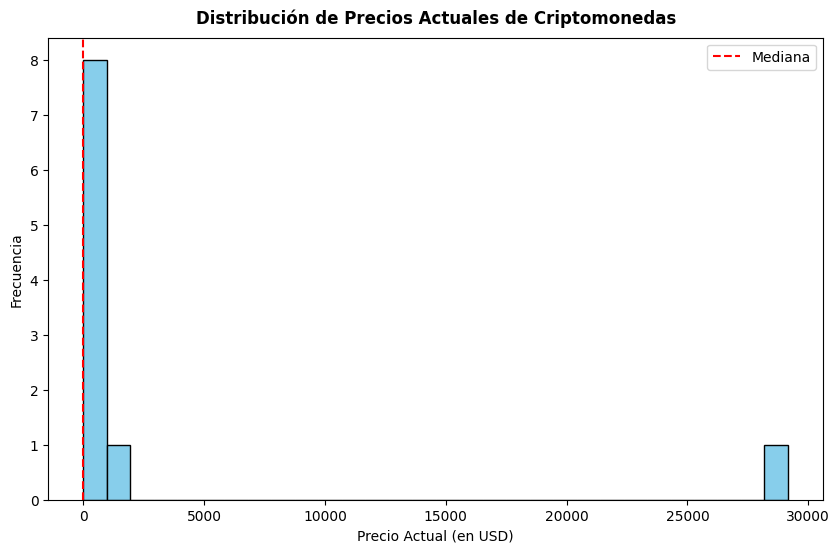

In [133]:
plt.figure(figsize = (10, 6))
plt.hist(crypto['current_price'], bins = 30, color = 'skyblue', edgecolor = 'black')
plt.axvline(x=crypto['current_price'].median(), color = 'red', linestyle = 'dashed', label = 'Mediana')
plt.title('Distribución de Precios Actuales de Criptomonedas', pad = 10, fontweight = 'bold')
plt.xlabel('Precio Actual (en USD)')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

En un apartado de distribución por precio de cada criptomoneda, podemos apreciar que la media oscila entre USD $0 y USD $1. Teniendo como valores atípicos, algunas monedas que oscilan entre USD $500 y USD $1500, asi como otras pocas entre USD $28000 y USD $29200.

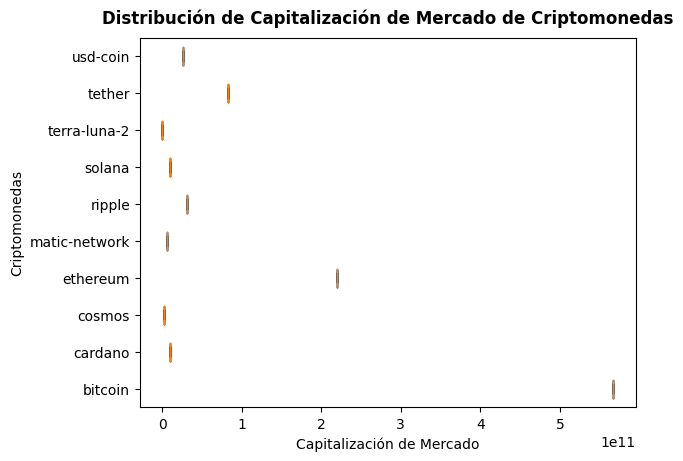

In [138]:
grouped_crypto = crypto.groupby('id')['market_cap']
df_by_coin = [grouped_crypto.get_group(coin) for coin in grouped_crypto.groups]

plt.boxplot(df_by_coin, labels = grouped_crypto.groups.keys(), vert = False)
plt.title('Distribución de Capitalización de Mercado de Criptomonedas', pad = 10, fontweight = 'bold')
plt.xlabel('Capitalización de Mercado')
plt.ylabel('Criptomonedas')
plt.show()

Luego podemos apreciar outliers en la Capitalización de Mercado de las criptomonedas. 'Bitcoin' es la moneda que supera los estándares, seguida de 'Ethereum' aunque con una capitalización bastante menor a ésta.

## Visualizaciones de datos específicos.

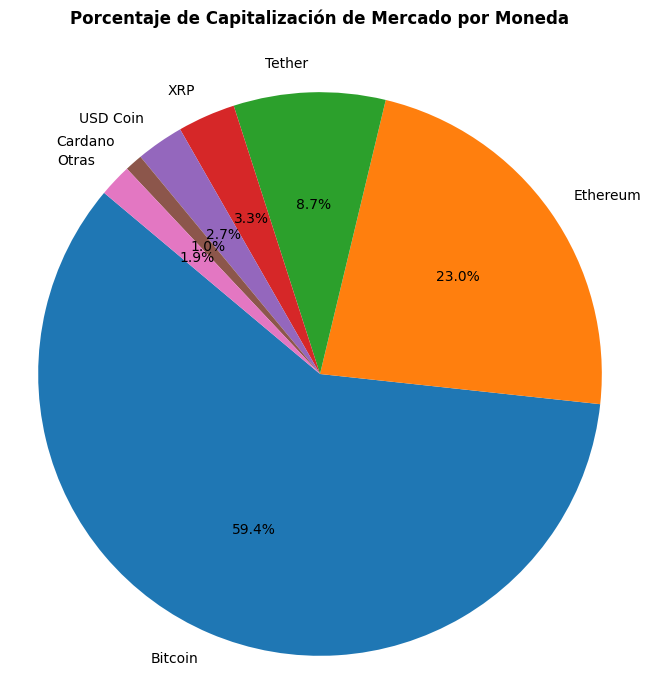

In [130]:
crypto['market_cap_percentage'] = crypto['market_cap'] / crypto['market_cap'].sum() * 100
top_coins = crypto[crypto['market_cap_percentage'] > 1]
other_coins = crypto[crypto['market_cap_percentage'] < 1]
other_row = pd.DataFrame({
    'name': 'Otras',
    'market_cap_percentage': other_coins['market_cap_percentage'].sum()
}, index=[0])
top_coins = pd.concat([top_coins, other_row])

plt.figure(figsize=(8, 8))
plt.pie(top_coins['market_cap_percentage'], labels=top_coins['name'], autopct = '%1.1f%%', startangle = 140)
plt.title('Porcentaje de Capitalización de Mercado por Moneda', pad = 30, fontweight = 'bold')
plt.axis('equal')
plt.show()

Podemos ver que el 'Bitcoin' posee el 59.4% de la capitalización total del mercado actual de las criptomonedas seleccionadas, posicionándola como la más utilizada. La siguen 'Ethereum' con un 23%, Tether con un 8.7%, XRP con un 3.3%, USD Coin con un 2.7%, Cardano con un 1% y el resto de las seleccionadas ocupando un 1.9%.

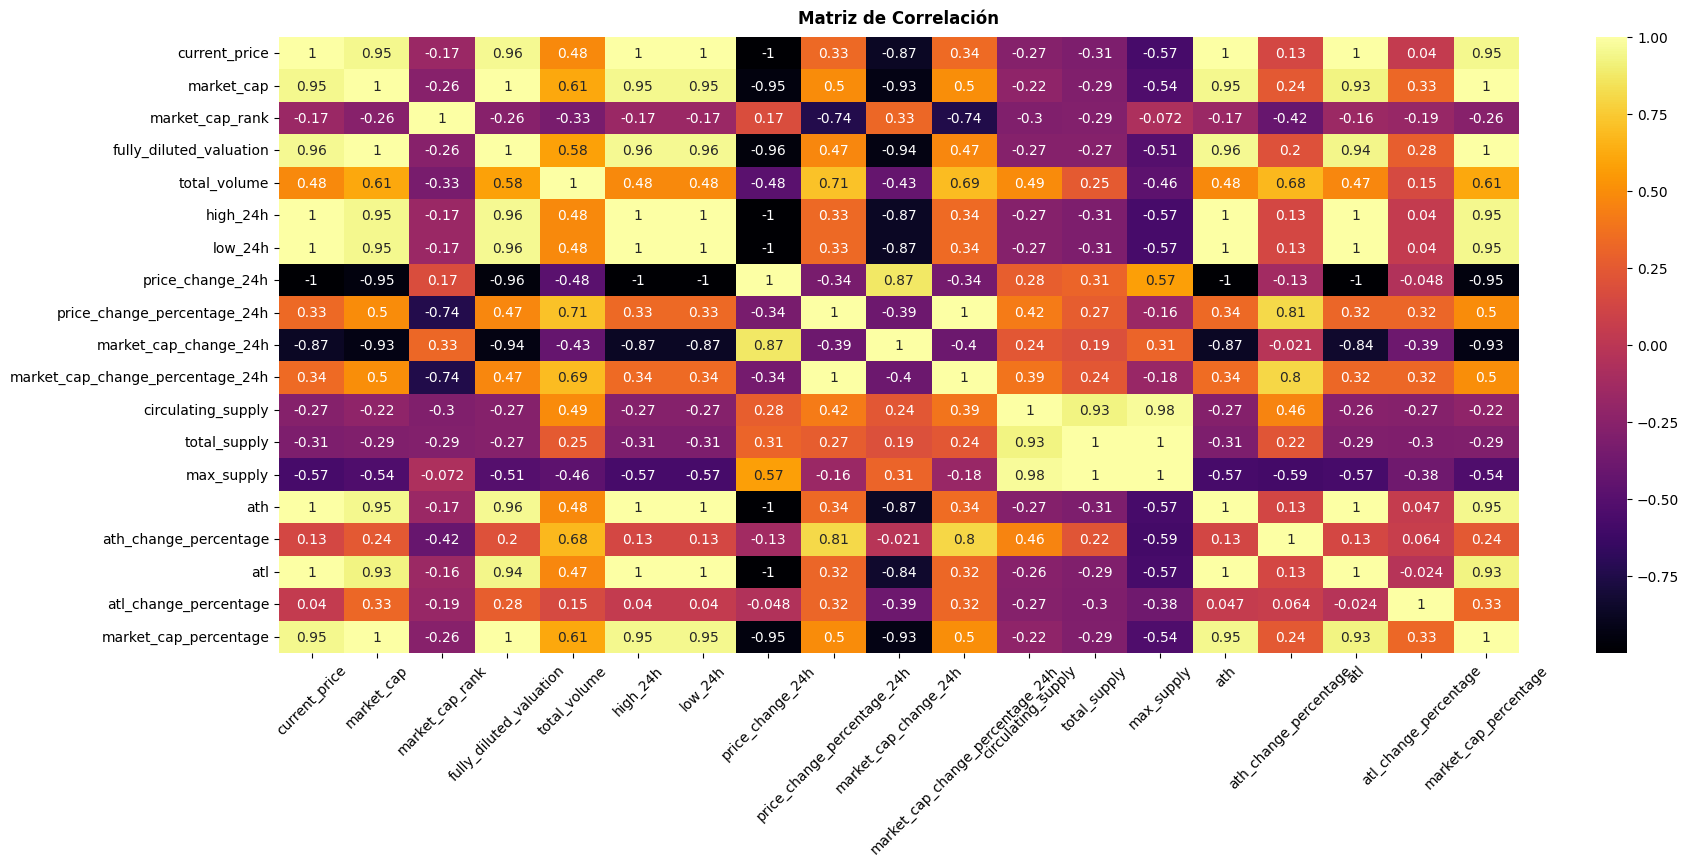

In [149]:
numeric_columns = crypto.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(20, 8))
sns.heatmap(correlation_matrix, annot = True, cmap = 'inferno', center = 0)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.title("Matriz de Correlación", pad = 10, fontweight = 'bold')
plt.show()

Podemos hacer una visualización directa de la correlación que hay entre cada uno de los datos y así tomar mejores decisiones a partir de la matriz de calor. 

## KPI N°1: Inversiones en Monedas Seguras

Tenemos como objetivo aumentar un 10% de la inversión inicial que hagamos en nuestra cartera de criptomonedas que sean poco volátiles, poco riesgosas y rentables en el tiempo a modo de colchón.

## KPI N°2: Inversiones en Monedas Estables

Tenemos como objetivo aumentar un 20% de la inversión inicial que hagamos en nuestra cartera de criptomonedas que se mantengan estables uno a uno con el dólar, con el fin principal de tener un resguardo en esta moneda. También se destinara este fondo para compras que requieren de gran capital en una criptomoneda que esté en alza. Cuando posees una cuenta con fondos, los exchanges (cambios entre criptomonedas) se realizan con más rapidez, a diferencia de cuando tenes que cargar dinero en una de las múltiples plataformas de criptomonedas existentes.

## KPI N°3: Diversificación de la Cartera

Tenemos como objetivo aumentar la diversificación en un 15% de la cartera de inversión en criptomonedas a lo largo de un año, con el fin de mitigar el riesgo asociado con la volatilidad de las criptomonedas. También podremos aumentar las oportunidades en diferentes sectores del mercado de criptomonedas.